In [2]:
## Import Dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import csv
import requests
from config import api_token
from pprint import pprint
from datetime import datetime, timedelta

import yfinance as yf
## https://www.ssga.com/us/en/intermediary/etfs/funds/spdr-sp-500-etf-trust-spy#holdings

sp500_df = pd.read_csv('s&p500.csv')

In [3]:
 # 0. Script the


## Merge and clean the data

In [4]:
## Create the DF and get a list of all unique Tickers
sp500_df = sp500_df.dropna()

ticker_list = list(sp500_df['Ticker'])
sp500_df

,Name,Ticker,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,Apple Inc.,AAPL,3783310,2046251,7.110275,Information Technology,163874670.0,USD
1,Microsoft Corporation,MSFT,59491810,2588173,6.065087,Information Technology,82019920.0,USD
2,Amazon.com Inc.,AMZN,2313510,2000019,2.738040,Consumer Discretionary,98231640.0,USD
3,NVIDIA Corporation,NVDA,67066G10,2379504,1.923625,Information Technology,27105582.0,USD
4,Alphabet Inc. Class A,GOOGL,02079K30,BYVY8G0,1.825088,Communication Services,65626300.0,USD
...,...,...,...,...,...,...,...,...
499,Fox Corporation Class B,FOX,35137L20,BJJMGY5,0.012028,Communication Services,1532395.0,USD
500,Lincoln National Corp,LNC,53418710,2516378,0.009445,Financials,1698362.0,USD
501,First Republic Bank,FRC,33616C10,B4WHY15,0.008411,Financials,2003120.0,USD
502,News Corporation Class B,NWS,65249B20,BBGVT51,0.006133,Communication Services,1341504.0,USD


In [5]:
## We can only do 100 API calls/day. We'll need to break this up and each of us will need to do 100 a day until we get our info
## There are 504 Tickers in the S&P 500
first_hundred_tickers = ticker_list[:100]

In [6]:
# Create an empty DataFrame to store the yearly highest, lowest, open, and close prices
stocks_df = pd.DataFrame(columns=['Symbol','Year','Highest', 'Lowest', 'Open', 'Close'])

In [7]:
# Define a list of 100 stock symbols
stock_symbols = first_hundred_tickers
# Replace with your list of stock symbols

# Calculate the start and end dates for 10 years ago
start_date = '2013-01-01'
end_date = '2022-12-31'

# Fetch the yearly highest, lowest, open, and close prices for each stock
for symbol in stock_symbols:
    yearly_data = {}
    stock_data = {}
    try:
        
        stock_data = yf.download(symbol, start=start_date, end=end_date)
    
        # Add a column with the year of each data point
        stock_data['Year'] = stock_data.index.to_period('Y').strftime('%Y').astype(int)

        # Group the data by year and calculate the yearly highest, lowest, open, and close prices
        yearly_group = stock_data.groupby('Year')
        highest = yearly_group['High'].max()
        lowest = yearly_group['Low'].min()
        first = yearly_group['Open'].first()
        last = yearly_group['Close'].last()
    
        # Add the stock symbol to the yearly_data DataFrame and reset its index
        yearly_data['Symbol'] = symbol
        yearly_data['Highest'] = highest
        yearly_data['Lowest'] = lowest
        yearly_data['Open'] = first
        yearly_data['Close'] = last 
        
        yearly_df = pd.DataFrame(yearly_data)
        yearly_df_reset = yearly_df.reset_index().rename(columns={'index': 'Year'})
        
        #Append the yearly_data DataFrame to the stocks_df DataFrame
        stocks_df = pd.concat([stocks_df, yearly_df_reset], axis=0, ignore_index=True)

    except:
        print("Stock not found. Skipping...")
        pass
     
print("finished")
# Display the DataFrame with 100 stocks and their yearly highest, lowest, open, and close prices
stocks_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted
Stock not found. Skipping...
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[**

,Symbol,Year,Highest,Lowest,Open,Close
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499
...,...,...,...,...,...,...
983,CI,2018,227.130005,163.020004,204.139999,189.919998
984,CI,2019,207.279999,141.949997,187.690002,204.490005
985,CI,2020,224.960007,118.500000,205.389999,208.179993
986,CI,2021,272.809998,190.880005,209.139999,229.630005


In [8]:
stocks_df

,Symbol,Year,Highest,Lowest,Open,Close
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499
...,...,...,...,...,...,...
983,CI,2018,227.130005,163.020004,204.139999,189.919998
984,CI,2019,207.279999,141.949997,187.690002,204.490005
985,CI,2020,224.960007,118.500000,205.389999,208.179993
986,CI,2021,272.809998,190.880005,209.139999,229.630005


In [9]:
# Export the City_Data into a csv
stocks_df.to_csv("../output_data/stock100.csv")

In [10]:
print(ticker_list)

['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'BRK.B', 'GOOG', 'XOM', 'META', 'UNH', 'TSLA', 'JNJ', 'JPM', 'V', 'PG', 'MA', 'HD', 'CVX', 'LLY', 'MRK', 'ABBV', 'AVGO', 'PEP', 'KO', 'COST', 'TMO', 'PFE', 'MCD', 'WMT', 'BAC', 'CRM', 'CSCO', 'ABT', 'DIS', 'LIN', 'ACN', 'ADBE', 'DHR', 'TXN', 'NKE', 'WFC', 'NEE', 'CMCSA', 'VZ', 'PM', 'RTX', 'BMY', 'ORCL', 'NFLX', 'UPS', 'AMD', 'HON', 'QCOM', 'AMGN', 'LOW', 'COP', 'SBUX', 'T', 'INTU', 'INTC', 'UNP', 'MDT', 'MS', 'GS', 'CAT', 'BA', 'SPGI', 'PLD', 'IBM', 'ELV', 'LMT', 'GE', 'GILD', 'ISRG', 'DE', 'BKNG', 'SYK', 'BLK', 'MDLZ', 'NOW', 'AXP', 'AMAT', 'C', 'AMT', 'ADI', 'CVS', 'TJX', 'ADP', 'MMC', 'TMUS', 'REGN', 'VRTX', 'PYPL', 'MO', 'CB', 'ZTS', 'SCHW', 'SO', 'PGR', 'CI', 'DUK', 'TGT', 'FISV', 'BDX', 'BSX', 'SLB', 'EOG', 'LRCX', 'AON', 'NOC', 'CME', 'ITW', 'EQIX', 'CSX', 'ETN', 'CL', 'APD', 'MU', 'HUM', 'WM', 'ATVI', 'HCA', 'ICE', 'EL', 'CDNS', 'MMM', 'MPC', 'SNPS', 'ORLY', 'FCX', 'SHW', 'EW', 'PXD', 'FDX', 'CCI', 'GIS', 'KLAC', 'GD', 'AZO', 'PNC', 'D

In [11]:
# Create an empty DataFrame to store the yearly highest, lowest, open, and close prices
stocks_df2 = pd.DataFrame(columns=['Symbol','Year','Highest', 'Lowest', 'Open', 'Close'])

In [12]:
# Define a list of 500 stock symbols
stock_symbols2 = ticker_list
# Replace with your list of stock symbols

# Calculate the start and end dates for 10 years ago
start_date = '2013-01-01'
end_date = '2022-12-31'

# Fetch the yearly highest, lowest, open, and close prices for each stock
for symbol in stock_symbols2:
    yearly_data = {}
    stock_data = {}
    print(symbol)
    try:
        
        stock_data = yf.download(symbol, start=start_date, end=end_date)
    
        # Add a column with the year of each data point
        stock_data['Year'] = stock_data.index.to_period('Y').strftime('%Y').astype(int)

        # Group the data by year and calculate the yearly highest, lowest, open, and close prices
        yearly_group = stock_data.groupby('Year')
        highest = yearly_group['High'].max()
        lowest = yearly_group['Low'].min()
        first = yearly_group['Open'].first()
        last = yearly_group['Close'].last()
    
        # Add the stock symbol to the yearly_data DataFrame and reset its index
        yearly_data['Symbol'] = symbol
        yearly_data['Highest'] = highest
        yearly_data['Lowest'] = lowest
        yearly_data['Open'] = first
        yearly_data['Close'] = last 
        
        yearly_df = pd.DataFrame(yearly_data)
        yearly_df_reset = yearly_df.reset_index().rename(columns={'index': 'Year'})
        
        #Append the yearly_data DataFrame to the stocks_df DataFrame
        stocks_df2 = pd.concat([stocks_df2, yearly_df_reset], axis=0, ignore_index=True)
        
    except:
        print("Stock not found. Skipping...")
        pass
     
print("finished")
# Display the DataFrame with 100 stocks and their yearly highest, lowest, open, and close prices
stocks_df2

AAPL
[*********************100%***********************]  1 of 1 completed
MSFT
[*********************100%***********************]  1 of 1 completed
AMZN
[*********************100%***********************]  1 of 1 completed
NVDA
[*********************100%***********************]  1 of 1 completed
GOOGL
[*********************100%***********************]  1 of 1 completed
BRK.B
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted
Stock not found. Skipping...
GOOG
[*********************100%***********************]  1 of 1 completed
XOM
[*********************100%***********************]  1 of 1 completed
META
[*********************100%***********************]  1 of 1 completed
UNH
[*********************100%***********************]  1 of 1 completed
TSLA
[*********************100%***********************]  1 of 1 completed
JNJ
[*********************100%***********************]  1 of 1 completed
JPM
[********

[*********************100%***********************]  1 of 1 completed
VICI
[*********************100%***********************]  1 of 1 completed
AMP
[*********************100%***********************]  1 of 1 completed
CMI
[*********************100%***********************]  1 of 1 completed
FIS
[*********************100%***********************]  1 of 1 completed
DD
[*********************100%***********************]  1 of 1 completed
DLTR
[*********************100%***********************]  1 of 1 completed
BK
[*********************100%***********************]  1 of 1 completed
ODFL
[*********************100%***********************]  1 of 1 completed
ON
[*********************100%***********************]  1 of 1 completed
PEG
[*********************100%***********************]  1 of 1 completed
GEHC
[*********************100%***********************]  1 of 1 completed
AME
[*********************100%***********************]  1 of 1 completed
ROK
[*********************100%***********************]

[*********************100%***********************]  1 of 1 completed
RJF
[*********************100%***********************]  1 of 1 completed
WAB
[*********************100%***********************]  1 of 1 completed
VTR
[*********************100%***********************]  1 of 1 completed
DRI
[*********************100%***********************]  1 of 1 completed
CMS
[*********************100%***********************]  1 of 1 completed
STLD
[*********************100%***********************]  1 of 1 completed
NVR
[*********************100%***********************]  1 of 1 completed
NTRS
[*********************100%***********************]  1 of 1 completed
FICO
[*********************100%***********************]  1 of 1 completed
EXPD
[*********************100%***********************]  1 of 1 completed
CAG
[*********************100%***********************]  1 of 1 completed
SEDG
[*********************100%***********************]  1 of 1 completed
TSN
[*********************100%********************

,Symbol,Year,Highest,Lowest,Open,Close
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499
...,...,...,...,...,...,...
4888,DISH,2018,50.490002,23.219999,48.410000,24.969999
4889,DISH,2019,44.660000,24.250000,24.350000,35.470001
4890,DISH,2020,42.619999,17.090000,35.869999,32.340000
4891,DISH,2021,47.049999,28.530001,32.430000,32.439999


In [16]:
# Export the City_Data into a csv
stocks_df2.to_csv("../output_data/stock500.csv")

In [76]:
 # 1. stability of an industry


## Merge and clean the data

In [17]:
sp500price_df = pd.read_csv('../output_data/stock500.csv')
sp500price_df = sp500price_df .dropna()
del sp500price_df["Unnamed: 0"]

In [20]:
sp500price_df

,Symbol,Year,Highest,Lowest,Open,Close
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499
...,...,...,...,...,...,...
4888,DISH,2018,50.490002,23.219999,48.410000,24.969999
4889,DISH,2019,44.660000,24.250000,24.350000,35.470001
4890,DISH,2020,42.619999,17.090000,35.869999,32.340000
4891,DISH,2021,47.049999,28.530001,32.430000,32.439999


In [21]:
unique = sp500price_df['Symbol'].unique()
len(unique)

501

In [22]:
# Calculate the yearly return for each stock, which is the percentage change in price from the beginning of the year to the end of the year.
sp500price_df['Yearly Return (%)'] = (sp500price_df['Close']-sp500price_df['Open'])/sp500price_df['Open']*100
sp500price_df['Yearly Moving (%)'] = (sp500price_df['Highest']-sp500price_df['Lowest'])/sp500price_df['Lowest']*100
sp500price_df

,Symbol,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%)
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196
...,...,...,...,...,...,...,...,...
4888,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874
4889,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948
4890,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597
4891,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119


In [24]:
renamed_df = sp500price_df.rename(columns={"Symbol":"Ticker"})
merge_df = pd.merge(renamed_df, sp500_df, on="Ticker")
merge_df.head(25)

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
5,AAPL,2018,58.367500,36.647499,42.540001,39.435001,-7.299011,59.267349,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
6,AAPL,2019,73.492500,35.500000,38.722500,73.412498,89.586155,107.021128,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
7,AAPL,2020,138.789993,53.152500,74.059998,132.690002,79.165551,161.116585,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
8,AAPL,2021,182.130005,116.209999,133.520004,177.570007,32.991313,56.724900,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
9,AAPL,2022,182.940002,125.870003,177.830002,129.929993,-26.935842,45.340429,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD


In [25]:
# Export the Data into a csv
merge_df.to_csv("../output_data/merge.csv")

In [90]:
 # 1. stability of an industry


## Plot Sectors Yearly moving and changing

In [26]:
merge_df = pd.read_csv('../output_data/merge.csv')
del merge_df["Unnamed: 0"]
merge_df

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4889,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4890,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4891,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD


In [123]:
merge_df["Weighted Yearly Return"] = merge_df["Yearly Return (%)"]*merge_df["Weight"]
merge_df["Weighted Yearly Moving"] = merge_df["Yearly Moving (%)"]*merge_df["Weight"]
merge_df

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency,Weighted Yearly Return,Weighted Yearly Moving
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,9.243800,350.879490
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,277.639515,496.588378
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,-39.129156,328.772881
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,91.537594,232.214420
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,328.067298,386.864348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.257545,0.624673
4899,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.242905,0.447673
4900,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.052345,0.794582
4901,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.000164,0.345278


In [124]:
# Calculate the weight yearly return for each sector
grouped = merge_df.groupby(["Sector","Year"])
weighted_return_sector = grouped["Weighted Yearly Return"].mean()
df = pd.DataFrame(weighted_return_sector)
df = df.reset_index().rename(columns={'index': 'Sector'})
df

,Sector,Year,Weighted Yearly Return
0,Communication Services,2013,25.335798
1,Communication Services,2014,2.902466
2,Communication Services,2015,13.241167
3,Communication Services,2016,4.091127
4,Communication Services,2017,10.875608
...,...,...,...
105,Utilities,2018,0.163513
106,Utilities,2019,2.426936
107,Utilities,2020,-0.075121
108,Utilities,2021,1.355889


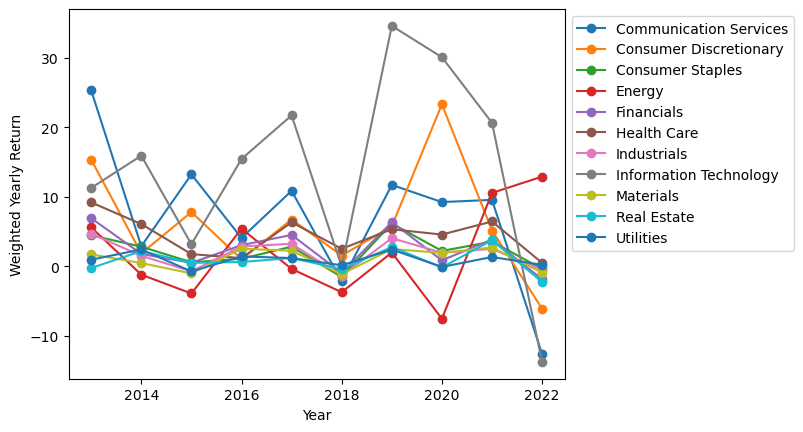

In [125]:
fig, ax = plt.subplots()

for sector in df['Sector'].unique():
    subset = df[df['Sector'] == sector]
    ax.plot(subset['Year'], subset['Weighted Yearly Return'], marker='o', linestyle='-', label=sector)

ax.set_xlabel('Year')
ax.set_ylabel('Weighted Yearly Return')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


In [126]:
# Calculate the weight yearly moving for each sector
grouped = merge_df.groupby(["Sector","Year"])
weighted_moving_sector = grouped["Weighted Yearly Moving"].mean()
df = pd.DataFrame(weighted_moving_sector)
df = df.reset_index().rename(columns={'index': 'Sector'})
df

,Sector,Year,Weighted Yearly Moving
0,Communication Services,2013,32.508770
1,Communication Services,2014,13.163667
2,Communication Services,2015,22.023521
3,Communication Services,2016,13.394258
4,Communication Services,2017,15.596372
...,...,...,...
105,Utilities,2018,3.324006
106,Utilities,2019,5.103118
107,Utilities,2020,8.018645
108,Utilities,2021,3.048522


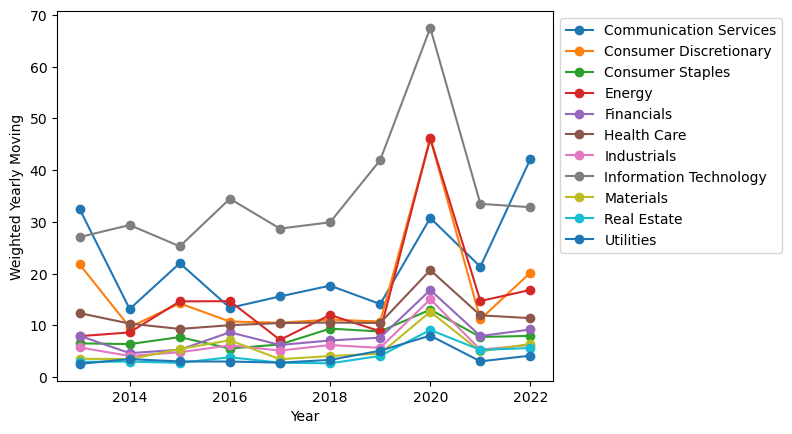

In [127]:
fig, ax = plt.subplots()

for sector in df['Sector'].unique():
    subset = df[df['Sector'] == sector]
    ax.plot(subset['Year'], subset['Weighted Yearly Moving'], marker='o', linestyle='-', label=sector)

ax.set_xlabel('Year')
ax.set_ylabel('Weighted Yearly Moving')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()